In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft as fft
from scipy.fftpack import fftfreq as fftfreq
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [3]:
tmp = np.genfromtxt("data/reactionRateData2/rate_0/run_0/density_2500.csv", delimiter=',')

In [3]:
tmp.shape

(3, 512)

In [27]:
array1 = np.zeros(4)
array2 = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 11):
        for k in range (2500, 3500, 10):
            tmp = np.genfromtxt("data/reactionRateData2/rate_{}/run_{}/density_{}.csv".format(i,j,k), delimiter=',')
            tmp1 = tmp[:, 64:68]
            tmp2 = tmp[:, 256:260]
            sum_down1 = tmp1.sum(axis=0)
            sum_down2 = tmp2.sum(axis=0)
            array1[i] += np.mean(sum_down1) 
            array2[i] += np.mean(sum_down2)

array1 = array1 / 1000
array2 = array2 / 1000

In [29]:
rates = np.array([0.1, 2.5, 5.0, 10.0])

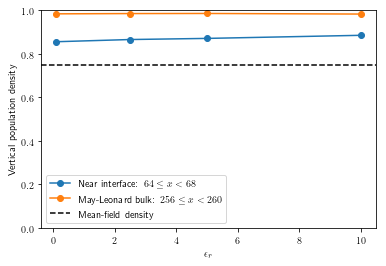

In [63]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(rates, array1, marker="o", label=r'Near interface: $64 \leq x < 68$')
ax1.plot(rates, array2, marker="o", label=r'May-Leonard bulk: $256 \leq x < 260$')
ax1.set_xlabel(r'$\epsilon_r$')
ax1.set_ylabel(r'Vertical population density')
ax1.axhline(0.75, linestyle='--', color='k', label="Mean-field density")
ax1.set_ylim(bottom=0, top=1)
ax1.legend()
plt.savefig("density.png")

In [56]:
binned_births1 = np.zeros(4)
binned_births2 = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 11):
        for k in range (2500, 3500, 10):
            tmp1 = np.genfromtxt("data/reactionRateData2/rate_{}/run_{}/binned_birth_counts_{}.csv".format(i,j,k), delimiter=',')
            sum_down = tmp1.sum(axis=0)
            binned_births1[i] += sum_down[17]
            binned_births2[i] += sum_down[65]

binned_births1 = binned_births1 / 4000
binned_births2 = binned_births2 / 4000

In [57]:
binned_deaths1 = np.zeros(4)
binned_deaths2 = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 11):
        for k in range (2500, 3500, 10):
            tmp1 = np.genfromtxt("data/reactionRateData2/rate_{}/run_{}/binned_birth_counts_{}.csv".format(i,j,k), delimiter=',')
            sum_down = tmp1.sum(axis=0)
            binned_deaths1[i] += sum_down[17]
            binned_deaths2[i] += sum_down[65]

binned_deaths1 = binned_deaths1 / 4000
binned_deaths2 = binned_deaths2 / 4000

In [10]:
binned_hops = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 25):
        tmp1 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_diffusion_counts_5000.csv".format(i,j), delimiter=',')
        tmp2 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_diffusion_counts_5010.csv".format(i,j), delimiter=',')
        tmp3 = (tmp2-tmp1)/10        
        sum_down = tmp3.sum(axis=0)
        binned_hops[i] += sum_down[17]
binned_hops = binned_hops / 25

In [59]:
binned_reactions1 = binned_births1 + binned_deaths1 
binned_reactions2 = binned_births2 + binned_deaths2 

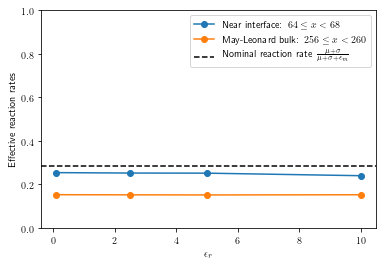

In [65]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(rates, binned_reactions1/512, marker="o", label=r'Near interface: $64 \leq x < 68$')
ax2.plot(rates, binned_reactions2/512, marker="o", label=r'May-Leonard bulk: $256 \leq x < 260$')
ax2.set_xlabel(r'$\epsilon_r$')
ax2.set_ylabel(r'Effective reaction rates')
ax2.axhline((2.0)/7, linestyle='--', color='k', label=r"Nominal reaction rate $ \frac{\mu + \sigma}{\mu + \sigma + \epsilon_m} $")
ax2.legend()
ax2.set_ylim(bottom=0, top=1.0)
plt.savefig("reaction_rates.png")